Local imports and initialization

In [1]:
import yaml
import sys, os

from IPython.display import Image, SVG

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.utils import *
from src.svg_quality_checks import *
from src.gpt_wrappers import *

# show svg 
def show_svg(file):
    display(SVG(file))

# load yaml config
with open("../config.yml", "r") as f:
    config = yaml.safe_load(f)


OpenAI and wandb related imports and initialization

In [2]:
import openai
import wandb

openai.api_key = config["OPENAI_KEY"]

run = wandb.init(
    project=config['WANDB_PROJECT'], 
    entity=config['WANDB_ENTITY']
)

results_table = wandb.Table(
    columns=[
                "system_prompt", 
                "question_prompt",
                "input_svg",
                "output_svg",
                "input_svg_code",
                "output_svg_code",
                "valid_check",
                "size_check"
    ]
)

wandb: Currently logged in as: alejandro-alonso (penpot_protoprompt). Use `wandb login --relogin` to force relogin


# Zero-shot learning (no examples)

## Case 1: bottom app bar
### Case 1.1 Add a "+" on the right side of the bottom app bar


bottom_app_bar_short_optimized.svg:
Done in 115 ms!
12.4 KiB - 60.7% = 4.877 KiB


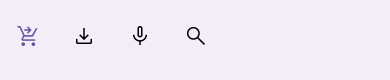

In [20]:
FILENAME = "bottom_app_bar_short"
svg_original = load_raw_svg_optimize_clean(FILENAME)
show_svg(f'../data/svgs/{FILENAME}_optimized.svg')

In [22]:
question = f"""
    This is a SVG file with app bottom bar buttons: \n

    {svg_original}
    
    Generate a SVG containing a button with a big plus sign on it in a round shape. 
    
    Keep the style of the original svg

    Keep it as short and optimized as you can.
    
    Start with <svg ... and end with </svg>
"""

answer = openai.Completion.create(
    model="text-davinci-003",
    temperature=0.8,
    max_tokens=1500,
    prompt=question).choices[0].text
print(answer)
print("Quality check:", validate_svg(answer), get_svg_size(answer))


<svg width="48" height="48" fill="none" style="-webkit-print-color-adjust:exact"><defs><clipPath id="a" class="frame-clip-def frame-clip"><rect width="48" height="48" rx="24" ry="24" style="opacity:1"/></clipPath></defs><g clip-path="url(#a)"><g class="fills"><rect width="48" height="48" class="frame-background" rx="24" ry="24" style="opacity:1"/></g><g class="frame-children"><rect width="48" height="48" class="fills" rx="24" ry="24" style="fill:#fffbfe;fill-opacity:1"/><rect width="48" height="48" class="fills" rx="24" ry="24" style="opacity:.08;fill:#6750a4;fill-opacity:1"/><path d="M24 10.5L14.5 20H9v5h5.5L24 35.5l9.5-9.5H39V20h-5.5L24 10.5z" style="fill:#000"/></g></g></svg>
Quality check: True (48.0, 48.0)



bottom_app_bar_short_optimized.svg:
Done in 39 ms!
0.676 KiB - 0.7% = 0.671 KiB


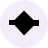

In [23]:
save_gpt_answer_as_svg(answer, FILENAME)
show_svg(f'../generated_data/{FILENAME}_optimized.svg')

In [6]:
results_table.add_data(
    *[
        "complete", question, wandb.Html(f'../data/svgs/{FILENAME}_optimized.svg'),
        wandb.Html(f'../generated_data/{FILENAME}_optimized.svg'),
        svg_original, answer,
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Case 2: filled button
### Case 2.1: generate other buttons


common_buttons_short_optimized.svg:
Done in 50 ms!
3.814 KiB - 68.6% = 1.199 KiB


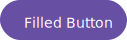

In [24]:
FILENAME = "common_buttons_short"
svg_original = load_raw_svg_optimize_clean(FILENAME)
show_svg(f'../data/svgs/{FILENAME}_optimized.svg')

In [25]:
question = f"""
    This is a SVG file with a single button filled with color: \n

    {svg_original}

    Generate a SVG with with the pressed version of the button.
    Keep it as short and optimized as you can. 
    Start with <svg ... and end with </svg>
"""

answer = openai.Completion.create(
    model="text-davinci-003",
    temperature=0.1,
    max_tokens=1500,
    prompt=question).choices[0].text
print(answer)
print("Quality check:", validate_svg(answer), get_svg_size(answer))


<svg width="127" height="40" fill="none" style="-webkit-print-color-adjust:exact"><g class="fills"><rect width="126" height="40" class="frame-background" rx="0" ry="0"/></g><g class="frame-children"><defs><clipPath id="a" class="frame-clip-def frame-clip"><rect width="127" height="40" rx="0" ry="0"/></clipPath></defs><g clip-path="url(#a)"><g class="fills"><rect width="127" height="40" class="frame-background" rx="0" ry="0"/></g><g class="frame-children"><rect width="127" height="40" class="fills" rx="20" ry="20" style="opacity:1;fill:#6750a4;fill-opacity:0.5"/><defs><clipPath id="b" class="frame-clip-def frame-clip"><rect width="127" height="40" rx="0" ry="0"/></clipPath></defs><g clip-path="url(#b)"><g class="fills"><rect width="127" height="40" class="frame-background" rx="0" ry="0"/></g><g class="frame-children"><g class="text-container"><text x="24" y="27.852" class="fills" dominant-baseline="ideographic" lengthAdjust="spacingAndGlyphs" style="text-transform:none;font-family:Robo


common_buttons_short_optimized.svg:
Done in 45 ms!
1.207 KiB - 0.6% = 1.2 KiB


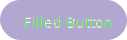

In [26]:
save_gpt_answer_as_svg(answer, FILENAME)
show_svg(f'../generated_data/{FILENAME}_optimized.svg')

In [10]:
results_table.add_data(
    *[
        "complete", question, wandb.Html(f'../data/svgs/{FILENAME}_optimized.svg'),
        wandb.Html(f'../generated_data/{FILENAME}_optimized.svg'),
        svg_original, answer,
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Case 3: segmented buttons
### Case 3.1: make other buttons active one by one


segmented_buttons_short_optimized.svg:
Done in 118 ms!
13.162 KiB - 70.3% = 3.909 KiB


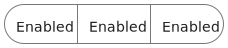

In [11]:
FILENAME = "segmented_buttons_short"
svg_original = load_raw_svg_optimize_clean(FILENAME)
show_svg(f'../data/svgs/{FILENAME}_optimized.svg')

In [12]:
question = f"""
    This a SVG file with 3 empty segmented buttons panel: \n

    {svg_original}

    Generate a SVG with containing only the middle button in an active state.

    Keep it as short and optimized as you can. 
    Start with <svg ... and end with </svg>
"""

answer = openai.Completion.create(
    model="text-davinci-003",
    temperature=0.1,
    max_tokens=1500,
    prompt=question).choices[0].text
print(answer)
print("Quality check:", validate_svg(answer), get_svg_size(answer))


<svg width="74" height="40" fill="none" style="-webkit-print-color-adjust:exact"><defs><clipPath id="a" class="frame-clip-def frame-clip"><rect width="74" height="40" rx="0" ry="0"/></clipPath></defs><g clip-path="url(#a)"><g class="fills"><rect width="74" height="40" class="frame-background" rx="0" ry="0"/></g><g class="frame-children"><g class="fills"><rect width="74" height="40" class="frame-background" rx="0" ry="0"/></g><g class="frame-children"><g class="text-container"><text x="89" y="31.852" class="fills" dominant-baseline="ideographic" lengthAdjust="spacingAndGlyphs" style="text-transform:none;font-family:Roboto;letter-spacing:.01px;font-style:normal;font-weight:500;white-space:pre;font-size:14px;text-decoration:none solid #1c1b1f;direction:ltr;fill:#1c1b1f;fill-opacity:1" textLength="50.219">Enabled</text></g></g><g class="strokes"><g class="inner-stroke-shape"><defs><clipPath id="c"><use href="#b"/></clipPath><rect id="b" width="74" height="40" class="frame-background" rx="


segmented_buttons_short_optimized.svg:
Done in 43 ms!
1.121 KiB - 0.5% = 1.115 KiB


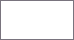

In [13]:
save_gpt_answer_as_svg(answer, FILENAME)
show_svg(f'../generated_data/{FILENAME}_optimized.svg')

In [14]:
results_table.add_data(
    *[
        "complete", question, wandb.Html(f'../data/svgs/{FILENAME}_optimized.svg'),
        wandb.Html(f'../generated_data/{FILENAME}_optimized.svg'),
        svg_original, answer,
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Case 4: switches
### Case 4.1 select elements + change the color palette


switch_full_optimized.svg:
Done in 218 ms!
22.691 KiB - 63.9% = 8.196 KiB


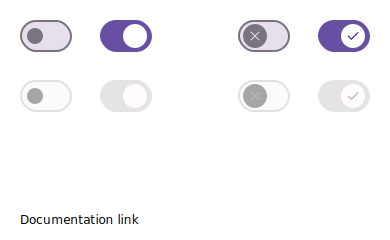

In [37]:
FILENAME = "switch_full"
svg_original = load_raw_svg_optimize_clean(FILENAME)
show_svg(f'../data/svgs/{FILENAME}_optimized.svg')

In [38]:
question = f"""
    This is XML for the SVG file with switch elements:

    {svg_original}

    Generate a new SVG with only one switch, with colors changed - they should be shades of green.

    Keep it as short and optimized as you can. 
    Start with <svg ... and end with </svg>
"""

answer = openai.Completion.create(
    model="text-davinci-003",
    temperature=0.1,
    max_tokens=500,
    prompt=question).choices[0].text
print(answer)
print("Quality check:", validate_svg(answer), get_svg_size(answer))


<svg width="52" height="32" fill="none" style="-webkit-print-color-adjust:exact"><defs><clipPath id="a" class="frame-clip-def frame-clip"><rect width="52" height="32" rx="0" ry="0" style="fill:#fff;fill-opacity:1"/></clipPath></defs><g clip-path="url(#a)"><g class="fills"><rect width="52" height="32" class="frame-background" rx="0" ry="0" style="fill:#fff;fill-opacity:1"/></g><g class="frame-children"><g class="fills"><rect width="52" height="32" class="frame-background" rx="16" ry="16" style="opacity:.12;fill:#009900;fill-opacity:1"/></g><g class="fills"><rect width="24" height="24" x="4" y="4" class="frame-background" rx="0" ry="0"/></g><g class="frame-children"><circle cx="16" cy="16" r="12" class="fills" style="fill:#fff;fill-opacity:1"/><g style="fill:#000"><path d="m14.3 19.9-3.733-3.733.716-.717 3.017 3.017 6.4-6.4.717.716L14.3 19.9Z" class="fills" style="fill:#009900;fill-opacity:1"/></g></g></g></g></svg>
Quality check: True (52.0, 32.0)



switch_full_optimized.svg:
Done in 43 ms!
0.911 KiB - 1.3% = 0.899 KiB


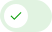

In [39]:
save_gpt_answer_as_svg(answer, FILENAME)
show_svg(f'../generated_data/{FILENAME}_optimized.svg')

In [18]:
results_table.add_data(
    *[
        "complete", question, wandb.Html(f'../data/svgs/{FILENAME}_optimized.svg'),
        wandb.Html(f'../generated_data/{FILENAME}_optimized.svg'),
        svg_original, answer,
        validate_svg(answer), get_svg_size(answer)
    ]
)

## Publish results to wandb

In [19]:
run.log({"results_table": results_table})

wandb: Network error (ReadTimeout), entering retry loop.
